# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [11]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)
stocks_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0,2006,732463
...,...,...,...,...,...,...,...,...,...,...
3867,2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0,2021,738068
3868,2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0,2021,738069
3869,2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0,2021,738070
3870,2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0,2021,738071


In [4]:
stocks_df.shape

(3872, 10)

In [5]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3872 non-null   datetime64[ns]
 1   Open            3872 non-null   float64       
 2   High            3872 non-null   float64       
 3   Low             3872 non-null   float64       
 4   Close           3872 non-null   float64       
 5   Volume          3872 non-null   int64         
 6   Dividends       3872 non-null   float64       
 7   Stock Splits    3872 non-null   float64       
 8   Year            3872 non-null   int64         
 9   Converted Date  3872 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 302.6 KB


In [6]:
stocks_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583,2013.583936,735265.486054
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706,4.454620,1622.149194
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000,2006.000000,732456.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000,2010.000000,733861.750000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000,2014.000000,735267.500000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000,2017.000000,736668.250000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000,2021.000000,738074.000000


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

In [7]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

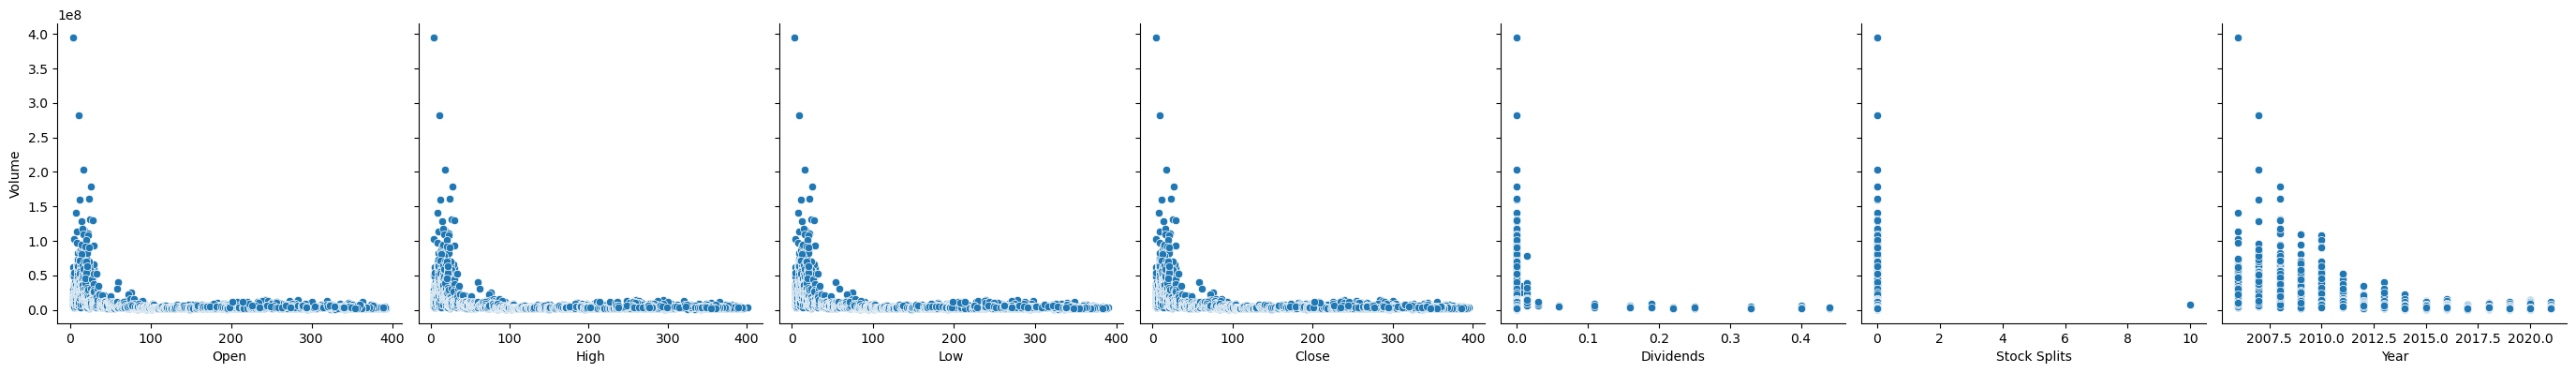

In [34]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(stocks_df, x_vars=['Open','High','Low','Close','Dividends','Stock Splits','Year'], 
             y_vars='Volume', size=4, aspect=1, kind='scatter')
plt.show()

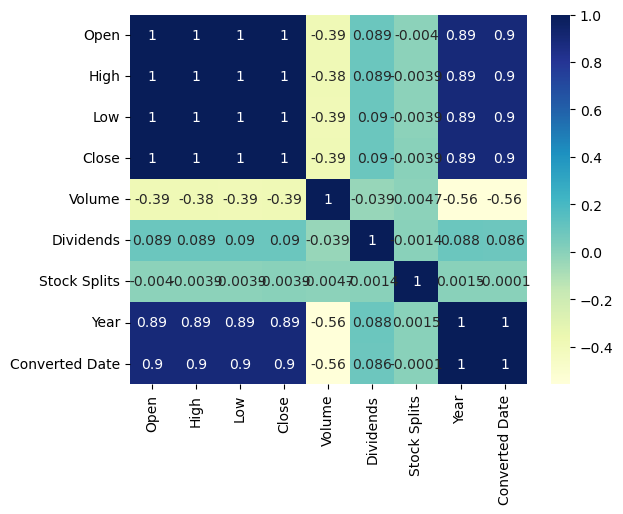

In [35]:
# Visualizing the data using heatmap
sns.heatmap(stocks_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [104]:
# Creating X and y
X = stocks_df['Open']
y = stocks_df['Close']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [105]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train

2457     84.777597
1540     41.789692
384      18.706097
2560     90.718854
3320    257.031441
           ...    
1930     75.228260
79        6.115560
1859     64.653030
2840    129.994696
1544     39.422718
Name: Open, Length: 2710, dtype: float64

In [106]:
# Take a look at the train dataset
y_train


2457     87.028160
1540     41.846542
384      18.312334
2560     90.932243
3320    253.907516
           ...    
1930     72.464973
79        6.057884
1859     65.574173
2840    129.896942
1544     40.199707
Name: Close, Length: 2710, dtype: float64

In [107]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    0.140820
Open     0.998287
dtype: float64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [108]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.289e+06
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:16:45   Log-Likelihood:                -6019.4
No. Observations:                2710   AIC:                         1.204e+04
Df Residuals:                    2708   BIC:                         1.205e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1408      0.060      2.330      0.020       0.022       0.259
Open           0.9983      0.000   2507.790      0.000       0.998       0.999
==============================================================================
Omnibus:                     1460.297   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52069.527
Skew:                          -1.922   Prob(JB):                         0.00
Kurtosis:                      24.127   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

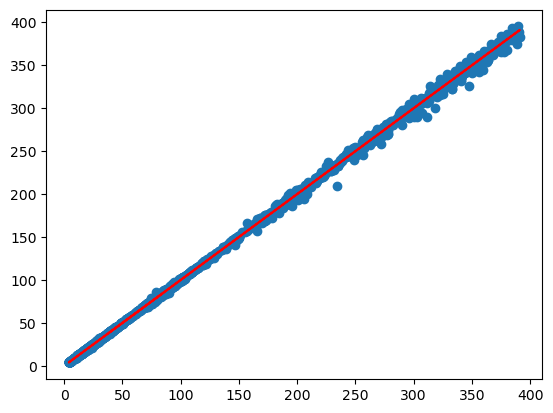

In [109]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.1408 + 0.9983*X_train, 'r')
plt.show()

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

In [110]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

Now plot the residuals. Did you get a bell curve?

No,I didn't get a bell curve.

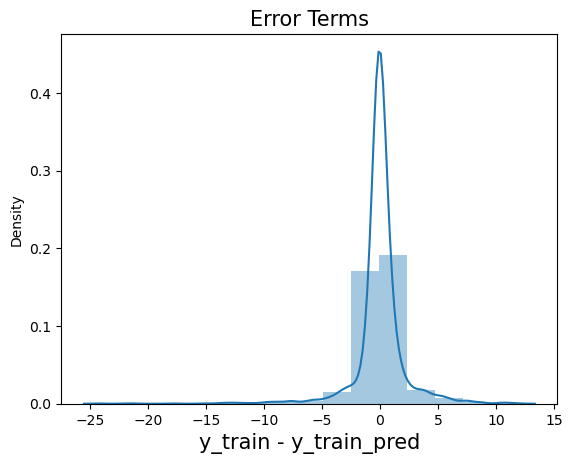

In [111]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

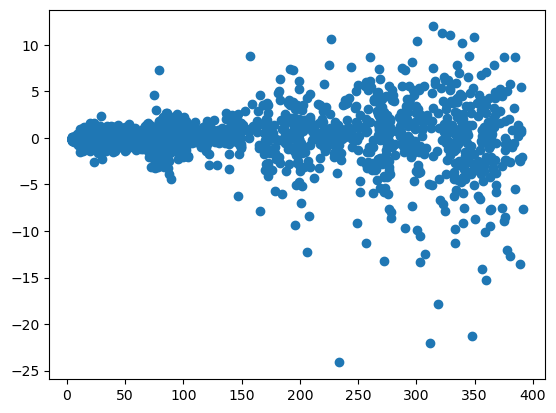

In [112]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [113]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

2424     88.475925
2643    102.971796
2501     93.871653
2044     72.314439
288      16.081481
           ...    
2219     85.886222
2875    143.317621
531      24.151443
2844    139.348870
2689    103.155731
Length: 1162, dtype: float64

In [114]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9995646250663265

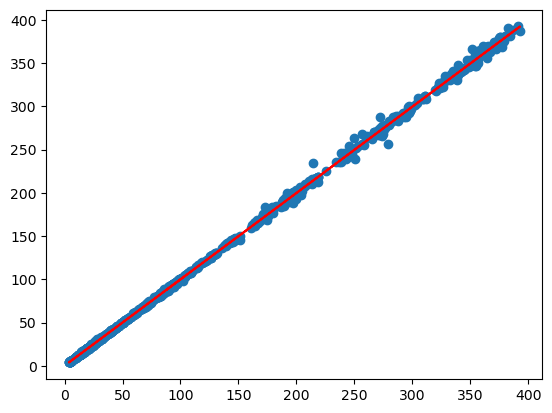

In [115]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [116]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [117]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(2710, 1)
(1162, 1)


In [118]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [119]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 0.1408195325677326
Slope : [0.9982872]


In [120]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9995695929149122
0.9995646250663265


## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?

Yes.My R-squared value is 0.9995

2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? 
Yes.it is useful to predict the price of Mastercard.